In [196]:
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [81]:
data = pd.read_excel('loss01.xlsx')

In [9]:
data.head()

,Kscraper=,Unnamed: 1,0.00976575387660838,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,начальные координаты,NaN,NaN,NaN,NaN,начальные координаты оставшихся частиц,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,x,y,de,s,NaN,xxa,yya,dea,s,...,Ошибки,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,DX0B,DX0Q,DX0S,0.0,0.0,0.0,Npart,35672.0,"bx,m",15.673888
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DY0B,DY0Q,DY0S,0.0,0.0,0.0,deltP,0.0,ax,0.005536


In [82]:
data = data.iloc[:,16:59]

In [25]:
LOST1 = data.iloc[:,[23,24,26]]

In [32]:
LOST1 = LOST1.iloc[2:-1]

In [33]:
lost1 = LOST1

In [37]:
lost1 = lost1.dropna()

In [74]:
lost1.head()

,s,x,y
2,s,x,y
3,269.844567,0.013515,0.000001
4,269.172793,0.013854,0.000001
5,264.649245,0.013935,0.00001
6,264.709245,0.013941,0.000006


In [64]:
lost1.columns = lost1.iloc[0]

In [76]:
lost1 = lost1.iloc[1:-1].reset_index(drop=True)

In [77]:
lost1

,s,x,y
0,269.844567,0.013515,0.000001
1,269.172793,0.013854,0.000001
2,264.649245,0.013935,0.00001
3,264.709245,0.013941,0.000006
4,265.430051,0.013502,-0.000002
...,...,...,...
30304,60.669223,0.000525,0.003007
30305,358.257273,0.000794,0.003033
30306,60.765191,-0.000282,0.003034
30307,90.523996,0.001881,-0.003016


<AxesSubplot:xlabel='x', ylabel='y'>

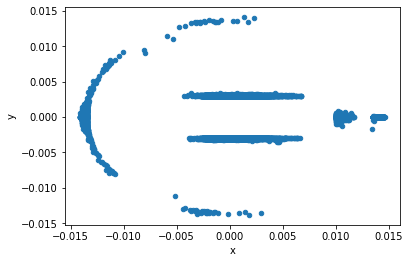

In [78]:
lost1.plot(x='x', y='y', kind='scatter')

In [83]:
data2 = pd.read_excel('loss01.xlsx', sheet_name=2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,1.000000,2.000000,NaN
1,NaN,xc,0.000000,0.000000,NaN
2,NaN,yc,0.000000,0.000000,NaN
3,NaN,ax,-0.013500,-0.013500,NaN
4,NaN,ax,0.013500,0.013500,NaN
...,...,...,...,...,...
69,6.0,0.012962,-0.003772,0.012962,0.003772
70,6.1,0.013274,-0.002459,0.013274,0.002459
71,6.2,0.013453,-0.001122,0.013453,0.001122
72,6.3,0.013498,0.000227,0.013498,-0.000227


In [88]:
ellipse_coord = data2.iloc[9:-1, [3,4]]

In [89]:
ellipse_coord

,Unnamed: 3,Unnamed: 4
9,0.013500,0.000000
10,0.013433,-0.001348
11,0.013231,-0.002682
12,0.012897,-0.003990
13,0.012434,-0.005257
...,...,...
68,0.012521,0.005047
69,0.012962,0.003772
70,0.013274,0.002459
71,0.013453,0.001122


In [90]:
ellipse_coord.columns = ['ax', 'ay']

In [92]:
ellipse_coord.reset_index(drop=True, inplace=True)

In [93]:
ellipse_coord

,ax,ay
0,0.013500,0.000000
1,0.013433,-0.001348
2,0.013231,-0.002682
3,0.012897,-0.003990
4,0.012434,-0.005257
...,...,...
59,0.012521,0.005047
60,0.012962,0.003772
61,0.013274,0.002459
62,0.013453,0.001122


Text(0.5, 0, 'x, m')

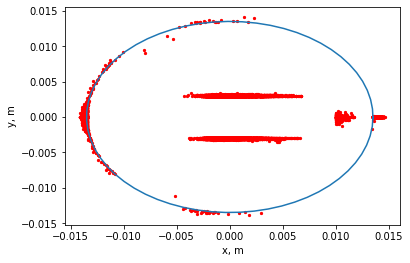

In [100]:

plt.scatter(lost1.x, lost1.y, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('y, m')
plt.xlabel('x, m')

<AxesSubplot:ylabel='Frequency'>

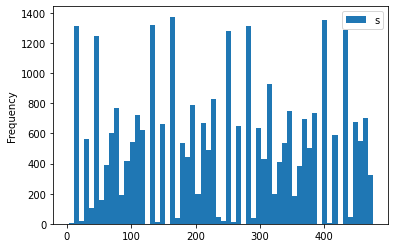

In [125]:
lost1.plot(y='s', kind='hist',bins=60)

In [117]:
lost1_bladeless= lost1.loc[~((lost1.x.between(-0.006,0.012,inclusive=False))&(lost1.y.between(-0.005,0.005,inclusive=False)))]

C:\Users\User\AppData\Local\Temp\ipykernel_10832\1030711569.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  lost1_bladeless= lost1.loc[~((lost1.x.between(-0.006,0.012,inclusive=False))&(lost1.y.between(-0.005,0.005,inclusive=False)))]


In [114]:
lost1_bladeless

,s,x,y
0,269.844567,0.013515,0.000001
1,269.172793,0.013854,0.000001
2,264.649245,0.013935,0.00001
3,264.709245,0.013941,0.000006
4,265.430051,0.013502,-0.000002
...,...,...,...
30179,475.383737,0.01005,0.000201
30180,255.065942,-0.013507,0.000199
30182,310.301352,-0.013508,0.000075
30239,399.627767,-0.013558,0.00099


Text(0.5, 0, 'x, m')

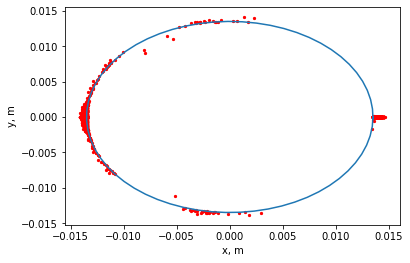

In [118]:
plt.scatter(lost1_bladeless.x, lost1_bladeless.y, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('y, m')
plt.xlabel('x, m')

<AxesSubplot:ylabel='Frequency'>

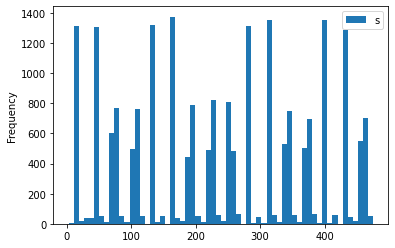

In [121]:
lost1_bladeless.plot(y='s', kind='hist', bins=60)

In [135]:
lost1.sort_values('s', axis=0, inplace=True)

In [136]:
lost1

,s,x,y
28111,2.9,-0.003084,-0.013723
4967,3.3,0.002974,-0.013631
10296,3.3,0.00228,0.013924
5558,3.350001,0.00146,-0.013422
18758,3.400002,0.001345,0.01409
...,...,...,...
24964,475.47838,0.009997,-0.000361
21246,475.667665,0.009999,0.000238
22063,475.762308,0.010006,-0.000006
29163,475.762308,0.010002,-0.000156


In [141]:
Tesla_period_df = pd.read_excel('B_8_sup.xlsx', index_col=0)

In [143]:
Tesla_period_df.head()

,Family,Type,"s,m","βx , m","βy , m","μ_x,rad","μ_y,rad","Disp_x,m","Angle,rad","K2,1/m2","K3,1/m3","len,m","rho, m","Girder_len,m","B, T","Angle,rad2","E_c,keV"
,,,,,,,,,,,,,,,,,
1,MS1_START,Marker,0.000,15.59743,2.36417,0.00000,0.00000,0.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
2,DR_265,Drift,0.000,15.59743,2.36417,0.00000,0.00000,0.0,NaN,NaN,NaN,2.650,NaN,NaN,NaN,NaN,NaN
3,MA1_KIC_3,Multipole,2.650,16.02221,5.16925,0.16843,0.86030,0.0,NaN,0.0,0.0,0.250,NaN,NaN,NaN,NaN,NaN
4,DR_0075,Drift,2.900,16.10877,5.74085,0.18399,0.90621,0.0,NaN,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN
5,MA1_PKU_1,Monitor,2.975,16.13630,5.92265,0.18864,0.91908,0.0,NaN,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN


In [155]:
mag_length = Tesla_period_df.loc[Tesla_period_df['B, T']>2]['s,m'].agg(lambda x: x.max()-x.min())
mag_pos1 = Tesla_period_df.loc[Tesla_period_df['B, T']>2]['s,m'].min()
mag_pos2 = Tesla_period_df.loc[Tesla_period_df['B, T']>2]['s,m'].max()

In [160]:
mag_pos1, mag_pos2

(14.80534, 14.91644)

In [201]:
Tesla_df = pd.read_excel('B_8.xlsx', index_col=0)

In [214]:
super_per = 29.609
periods = [(mag_pos1+i*super_per, mag_pos2+i*super_per) for i in range(1,16)]

In [215]:
periods

[(44.41434, 44.52544),
 (74.02334, 74.13444),
 (103.63234, 103.74343999999999),
 (133.24134, 133.35244),
 (162.85034000000002, 162.96144),
 (192.45934, 192.57044),
 (222.06834, 222.17944),
 (251.67734000000002, 251.78844),
 (281.28634, 281.39744),
 (310.89534000000003, 311.00644000000005),
 (340.50434, 340.61544000000004),
 (370.11334, 370.22444),
 (399.72234000000003, 399.83344000000005),
 (429.33134, 429.44244000000003),
 (458.94034000000005, 459.05144000000007)]

In [231]:
k=0
for i in periods:
    k+=1
    lost1[f'period{k}'] = lost1.s.between(i[0],i[1]).astype(int)
    lost1['is_rotary_mag'] += lost1[f'period{k}']
    lost1.drop(f'period{k}', axis=1, inplace=True)

In [234]:
lost1.is_rotary_mag.value_counts()

0    29878
1      431
Name: is_rotary_mag, dtype: int64

In [237]:
mag_lost_distrib_df = lost1.loc[lost1.is_rotary_mag==1].drop('is_rotary_mag', axis=1)

In [238]:
mag_lost_distrib_df

,s,x,y
2987,429.336572,-0.013743,-0.000001
4913,429.336572,-0.013716,0.0
11441,429.336572,-0.013685,0.001269
27111,429.336572,-0.013595,-0.000003
12026,429.336572,-0.01378,0.0
...,...,...,...
28723,458.983637,-0.013722,0.000002
11239,458.983637,-0.013665,0.0
22786,458.983637,-0.013549,-0.000016
24620,458.983637,-0.013705,-0.000001


Text(0.5, 0, 'x, m')

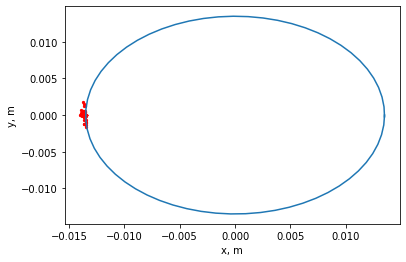

In [239]:
plt.scatter(mag_lost_distrib_df.x, mag_lost_distrib_df.y, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('y, m')
plt.xlabel('x, m')

<AxesSubplot:ylabel='Frequency'>

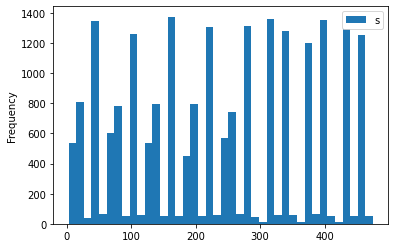

In [241]:
lost1_bladeless.plot(y='s', kind='hist', bins=40)